### Data Preparation

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('boston.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [25]:
legend = list(data.columns)[:-1]
legend_b = legend + ['BIAS']
legend_b

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'BIAS']

In [3]:
print(data.shape, data.isna().values.any(), data.duplicated().values.any())

(506, 14) False False


In [4]:
# Split data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [5]:
X_train = np.array(X_train.values.tolist())
X_test = np.array(X_test.values.tolist())
y_train = np.array(y_train.values.tolist())
y_test = np.array(y_test.values.tolist())

In [6]:
def Z_score(data):
  mean = np.mean(data, axis=0)
  std_dev = np.std(data, axis=0)
  data_normalized = (data - mean) / std_dev
  return data_normalized

def min_max(data):
  min_values = np.min(data, axis=0)
  max_values = np.max(data, axis=0)
  data_normalized = (data - min_values) / (max_values - min_values)
  return data_normalized

X_train = Z_score(X_train)
X_test = Z_score(X_test)
y_train = Z_score(y_train)
y_test = Z_score(y_test)

In [7]:
max(X_train[:, 2]), min(X_train[:, 2])

(2.3669143856497414, -1.4412968177269747)

### Least Mean Squares

In [8]:
# Full Learning with Anomaly Drop
def lms(data_set, w, lr, train=True):
  J = 0
  j = 0
  c = 0
  N = len(data_set)
  window_left = N-50 if N-50>=0 else 0
  gradient = 0
  
  for data_, label_ in data_set:
    # print("Data is: ", data)
    if c >= window_left:
      pred = w.T @ data_
      j = np.power((label_ - pred), 2) / (2*N)
      if j > 0.5:
        continue
      gradient += (label_ - pred) * data_ / N
      J += j

    c += 1
  w = w + lr * gradient
  print('Error: ', J)
  # print('error: {}, weight:{}'.format(E, w))
  return w, J

In [9]:
# Window Learning
def lms(data_set, w, lr, train=True):
  J = 0
  c = 0
  N = len(data_set)
  window_left = N-50 if N-50>=0 else 0
  gradient = 0
  
  for data_, label_ in data_set:
    if c >= window_left:
      pred = w.T @ data_
      gradient += (label_ - pred) * data_ / N
      J += np.power((label_ - pred), 2) / (2*N)

    c += 1
  print('Error: ', J)
  if train:
    w = w + lr * gradient
    return w, J
  else:
    return J
  
  # print('error: {}, weight:{}'.format(E, w))
  

In [10]:
weights = np.random.rand(X_train.shape[1])
# weights = np.full(X_train.shape[1], 0.1)
bias = np.random.rand(1)
learning_rate = 0.001

In [11]:
weights

array([0.6276301 , 0.95502142, 0.9825212 , 0.35004289, 0.30128904,
       0.4001642 , 0.32490887, 0.04004926, 0.86961037, 0.23898906,
       0.3385892 , 0.6771235 , 0.45546884])

In [12]:
# No bias
i = 1
dataset = []
weight_history = []
bias_history = []
error_history = []

for data, label in zip(X_train, y_train):
    print("==== input sample: {} ====".format(i))
    dataset.append([data, label])
    weights, loss = lms(dataset, weights, learning_rate)
    weight_history.append(weights)
    error_history.append(loss)

    i += 1

==== input sample: 1 ====
Error:  0.965904184334261
==== input sample: 2 ====
Error:  1.8858943337756429
==== input sample: 3 ====
Error:  1.270189614298205
==== input sample: 4 ====
Error:  1.7548257810781034
==== input sample: 5 ====
Error:  1.8957171890655888
==== input sample: 6 ====
Error:  2.342068782231385
==== input sample: 7 ====
Error:  2.129458626966757
==== input sample: 8 ====
Error:  1.8909890824803997
==== input sample: 9 ====
Error:  2.570205081170683
==== input sample: 10 ====
Error:  2.764584927701138
==== input sample: 11 ====
Error:  2.659527619374915
==== input sample: 12 ====
Error:  2.662335154689572
==== input sample: 13 ====
Error:  3.6172986753830187
==== input sample: 14 ====
Error:  4.296959222562076
==== input sample: 15 ====
Error:  5.148624340523726
==== input sample: 16 ====
Error:  4.816998837736685
==== input sample: 17 ====
Error:  4.495408255726894
==== input sample: 18 ====
Error:  4.325661367412668
==== input sample: 19 ====
Error:  4.2749262690650

In [13]:
print("Final train loss is: ", error_history[-1])

Final train loss is:  0.19300674487908961


### Least Mean Squares with bias

In [14]:
X_train_b = np.c_[X_train, np.ones((X_train.shape[0], 1))]
X_test_b = np.c_[X_test, np.ones((X_test.shape[0], 1))]

In [15]:
X_train_b.shape

(337, 14)

In [16]:
weights = np.random.rand(X_train.shape[1]+1)
# weights = np.full(X_train.shape[1], 0.1)
bias = np.random.rand(1)
learning_rate = 0.001

In [17]:
weights, weights.shape

(array([0.23873351, 0.48434835, 0.28546517, 0.85393578, 0.40585704,
        0.44272582, 0.86879144, 0.32152561, 0.33072567, 0.99960339,
        0.09225247, 0.48652329, 0.97721732, 0.37020305]),
 (14,))

In [19]:
# Adding bias
i = 1
dataset_ = []
weight_history_ = []
bias_history_ = []
error_history_ = []

for data_b, label in zip(X_train_b, y_train):
    print("==== input sample: {} ====".format(i))
    dataset_.append([data_b, label])
    weights, loss = lms(dataset_, weights, learning_rate)
    weight_history_.append(weights)
    error_history_.append(loss)

    i += 1

==== input sample: 1 ====
Error:  0.222092749179876
==== input sample: 2 ====
Error:  2.2945861005176966
==== input sample: 3 ====
Error:  1.5730859628932043
==== input sample: 4 ====
Error:  2.1156401188971556
==== input sample: 5 ====
Error:  2.1078906211595902
==== input sample: 6 ====
Error:  2.48300351795086
==== input sample: 7 ====
Error:  2.1208306023354475
==== input sample: 8 ====
Error:  1.853409959398163
==== input sample: 9 ====
Error:  2.583911177955805
==== input sample: 10 ====
Error:  2.853403273627486
==== input sample: 11 ====
Error:  2.8384994487945345
==== input sample: 12 ====
Error:  3.3316582852596004
==== input sample: 13 ====
Error:  4.819071034357341
==== input sample: 14 ====
Error:  5.7114471942394704
==== input sample: 15 ====
Error:  7.541118338175917
==== input sample: 16 ====
Error:  7.00478269457471
==== input sample: 17 ====
Error:  6.668357936579082
==== input sample: 18 ====
Error:  6.543998749353687
==== input sample: 19 ====
Error:  6.608208790435

In [20]:
print("Final train loss is: ", error_history_[-1])

Final train loss is:  0.21354569363567308


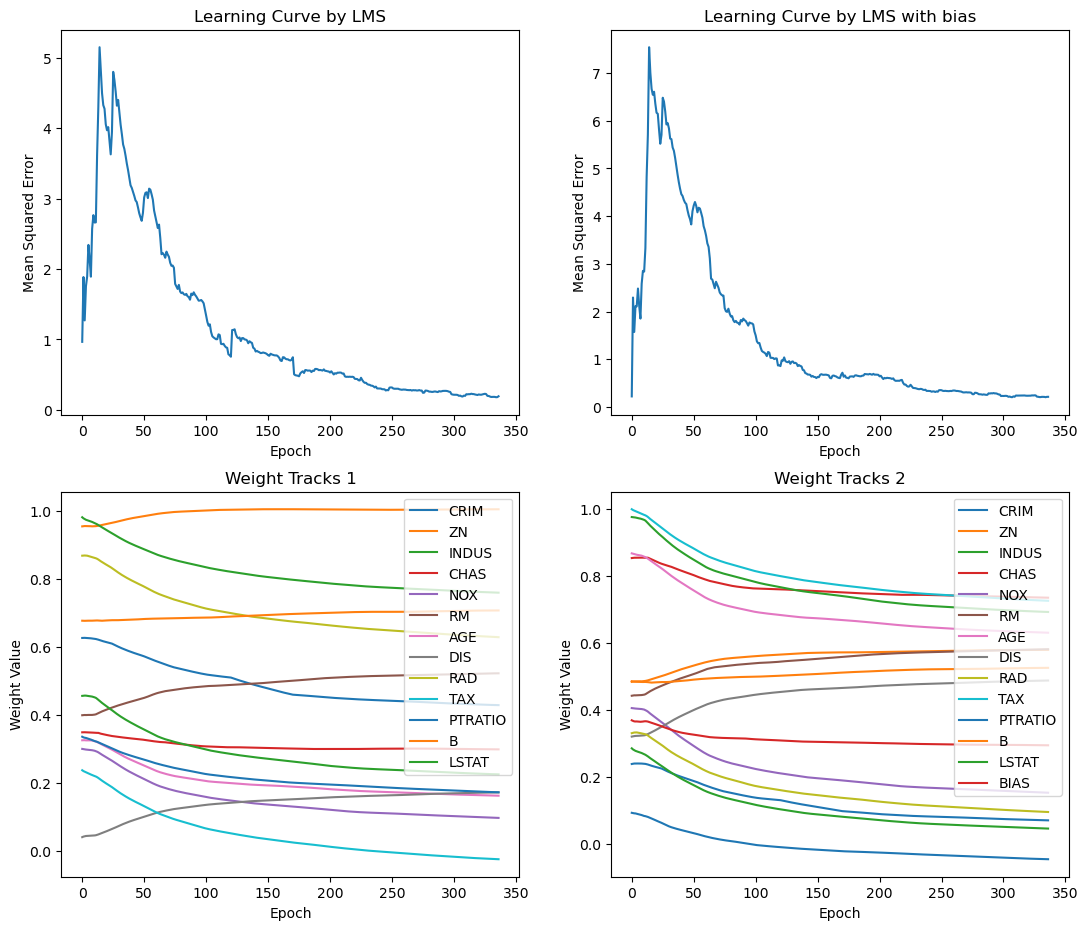

In [26]:
import matplotlib.pyplot as plt

# Plotting the learning curve
fig, axs = plt.subplots(2, 2, figsize=(13, 11))
axs[0, 0].plot(np.arange(len(error_history)), error_history)
axs[0, 0].set_title('Learning Curve by LMS')
axs[0, 0].set(xlabel='Epoch', ylabel='Mean Squared Error')

axs[0, 1].plot(np.arange(len(error_history_)), error_history_)
axs[0, 1].set_title('Learning Curve by LMS with bias')
axs[0, 1].set(xlabel='Epoch', ylabel='Mean Squared Error')

for i in range(X_train.shape[1]+1):
    if i < X_train.shape[1]:
      axs[1, 0].plot([w[i] for w in weight_history], label=f'Weight {i}')
    axs[1, 1].plot([w[i] for w in weight_history_], label=f'Weight {i}')
axs[1, 0].set_title('Weight Tracks 1')
axs[1, 0].set(xlabel='Epoch', ylabel='Weight Value')
axs[1, 0].legend(legend)
axs[1, 1].set_title('Weight Tracks 2')
axs[1, 1].set(xlabel='Epoch', ylabel='Weight Value')
axs[1, 1].legend(legend_b)

# plt.figure()
# plt.plot(np.arange(len(error_history)), error_history)
# plt.xlabel('Epoch')
# plt.ylabel('Mean Squared Error')
# plt.title('Learning Curve')
# plt.show()

# # Plotting the weight tracks
# plt.figure()
# for i in range(X_train.shape[1]):
#     plt.plot([w[i] for w in weight_history], label=f'Weight {i}')
# plt.xlabel('Epoch')
# plt.ylabel('Weight Value')
# plt.title('Weight Tracks')
# plt.legend()
# plt.show()